# This notebook is all plotting and bar graphs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score

%matplotlib inline

In [2]:
ames_housing = pd.read_csv('../datasets/clean_ames_housing_data.csv')

In [3]:
ames_housing.head()

Id        PID MS Zoning  Lot Frontage  Lot Area Street Lot Shape  \
0  109  533352170        RL           0.0     13517   Pave       IR1   
1  544  531379050        RL          43.0     11492   Pave       IR1   
2  153  535304180        RL          68.0      7922   Pave       Reg   
3  318  916386060        RL          73.0      9802   Pave       Reg   
4  255  906425045        RL          82.0     14235   Pave       IR1   

  Land Contour Utilities Lot Config  ... Screen Porch Pool Area Mo Sold  \
0          Lvl    AllPub    CulDSac  ...            0         0       3   
1          Lvl    AllPub    CulDSac  ...            0         0       4   
2          Lvl    AllPub     Inside  ...            0         0       1   
3          Lvl    AllPub     Inside  ...            0         0       4   
4          Lvl    AllPub     Inside  ...            0         0       3   

  Yr Sold Sale Type SalePrice  unfurnished_bsmt_percentage  \
0    2010       WD     130500                     0.264828   
1    2009       WD     220000                     0.302300   
2    2010       WD     109000                     0.308420   
3    2010       WD     174000                     1.000000   
4    2010       WD     138500                     1.000000   

   gr_liv_area_and_total_bsmt  all_bathrooms  yearsold_minus_year_remod  
0                      2204.0            3.0                          5  
1                      3035.0            4.0                         12  
2                      2114.0            2.0                          3  
3                      1828.0            3.0                          3  
4                      2121.0            2.0                         17  

[5 rows x 78 columns]

In [4]:
ames_housing.shape

(2051, 78)

In [5]:
ames_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 78 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Id                           2051 non-null   int64  
 1   PID                          2051 non-null   int64  
 2   MS Zoning                    2051 non-null   object 
 3   Lot Frontage                 2051 non-null   float64
 4   Lot Area                     2051 non-null   int64  
 5   Street                       2051 non-null   object 
 6   Lot Shape                    2051 non-null   object 
 7   Land Contour                 2051 non-null   object 
 8   Utilities                    2051 non-null   object 
 9   Lot Config                   2051 non-null   object 
 10  Land Slope                   2051 non-null   object 
 11  Neighborhood                 2051 non-null   object 
 12  Condition 1                  2051 non-null   object 
 13  Condition 2       

In [6]:
ames_housing.columns

Index(['Id', 'PID', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars',
 

In [7]:
ames_housing['Garage Type'] = ames_housing['Garage Type'].fillna('NA')

In [8]:
ames_housing['Garage Type'].value_counts()

Attchd     1213
Detchd      536
BuiltIn     132
NA          113
Basment      27
2Types       19
CarPort      11
Name: Garage Type, dtype: int64

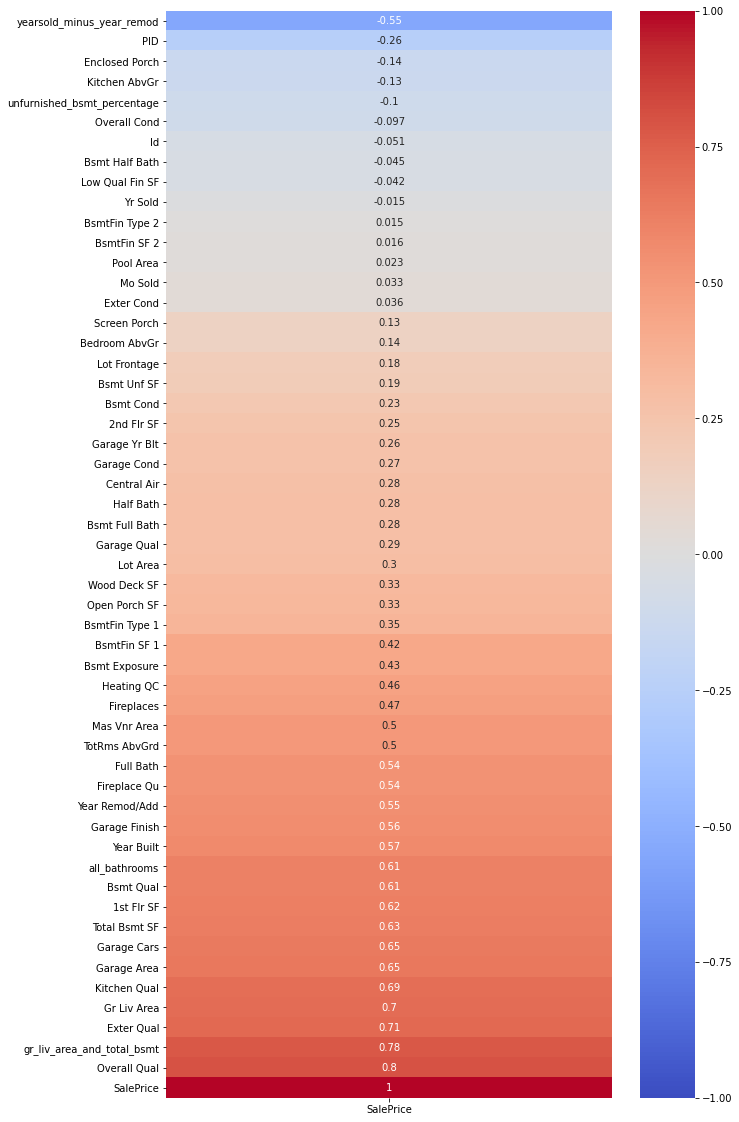

In [9]:
plt.figure(figsize=(10,20))
sns.heatmap(ames_housing.corr()[['SalePrice']].sort_values('SalePrice'),
           annot=True,
           cmap='coolwarm',
           vmin=-1,
           vmax=1);

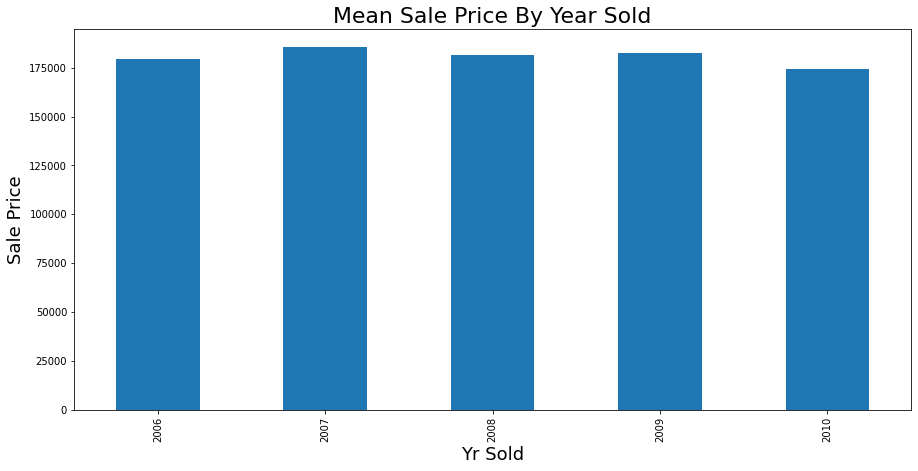

In [66]:
plt.figure(figsize = (15,7))
plt.title('Mean Sale Price By Year Sold', fontsize=22)
plt.ylabel('Sale Price', fontsize=18)
plt.xlabel('Year Home Sold', fontsize=18);
ames_housing.groupby('Yr Sold')['SalePrice'].mean().plot(kind='bar')

In [72]:
plt.figure(figsize = (10,7))
plt.title('Price Home Sold By Year Built', fontsize=22)
plt.ylabel('Sale Price', fontsize=18)
plt.xlabel('Year Built', fontsize=18);
plt.scatter(ames_housing['Year Built'],
            ames_housing['SalePrice'],
            color = 'blue');


In [73]:
plt.figure(figsize = (10,7))
plt.title('Price Home Sold By Year Remodeled', fontsize=22)
plt.ylabel('Sale Price', fontsize=18)
plt.xlabel('Year Remodeled', fontsize=18);
plt.scatter(ames_housing['Year Remod/Add'],
            ames_housing['SalePrice'],
            color = 'blue');

In [74]:
plt.figure(figsize = (10,7))
plt.title('Price Home Sold By How Long Since Being Remodeled', fontsize=22)
plt.ylabel('Sale Price', fontsize=18)
plt.xlabel('Year Since Last Remodel', fontsize=18);
plt.scatter(ames_housing['yearsold_minus_year_remod'],
            ames_housing['SalePrice'],
            color = 'blue');

In [64]:
plt.figure(figsize = (15,7))
plt.title('Mean Sale Price By Neighborhood', fontsize=22)
plt.ylabel('Sale Price', fontsize=18)
plt.xlabel('Neighborhood', fontsize=18);
ames_housing.groupby('Neighborhood')['SalePrice'].mean().plot(kind='bar')

In [93]:
# exploring correlation with dummied neighhborhood
ames_housing_dummy_neighborhood = pd.get_dummies(ames_housing, columns=['Neighborhood'])

ames_housing_dummy_neighborhood.corrwith(ames_housing_dummy_condition_2['SalePrice']).sort_values()

yearsold_minus_year_remod     -0.551716
PID                           -0.255052
Neighborhood_OldTown          -0.208371
Neighborhood_NAmes            -0.189387
Neighborhood_IDOTRR           -0.189237
Neighborhood_Edwards          -0.176119
Enclosed Porch                -0.135656
Neighborhood_BrkSide          -0.134790
Neighborhood_Sawyer           -0.133692
Kitchen AbvGr                 -0.125444
Neighborhood_MeadowV          -0.111558
unfurnished_bsmt_percentage   -0.102703
Overall Cond                  -0.097019
Neighborhood_BrDale           -0.095305
Neighborhood_SWISU            -0.074214
Id                            -0.051398
Neighborhood_NPkVill          -0.047296
Bsmt Half Bath                -0.045290
Low Qual Fin SF               -0.041594
Neighborhood_Mitchel          -0.035574
Neighborhood_Blueste          -0.025226
Yr Sold                       -0.015203
Neighborhood_Landmrk          -0.012395
Neighborhood_Greens            0.003476
BsmtFin Type 2                 0.014741


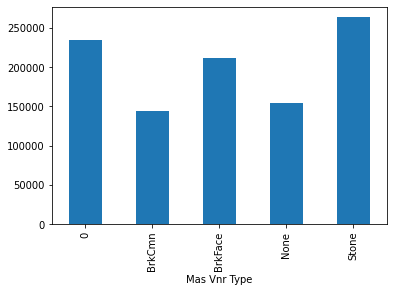

In [11]:
ames_housing.groupby('Mas Vnr Type')['SalePrice'].mean().plot(kind='bar')

In [12]:
ames_housing['Mas Vnr Type'].value_counts()

None       1218
BrkFace     630
Stone       168
0            22
BrkCmn       13
Name: Mas Vnr Type, dtype: int64

In [13]:
# Street                       
#  6   Lot Shape                     
#  7   Land Contour                 
#  8   Utilities                 
#  9   Lot Config                  
#  10  Land Slope                   
#  11  Neighborhood                 
#  12  Condition 1                   
#  13  Condition 2                 
#  14  Bldg Type                    
#  15  House Style   
#  Roof Style                 
#  21  Roof Matl                    
#  22  Exterior 1st                  
#  23  Exterior 2nd                 
#  24  Mas Vnr Type               

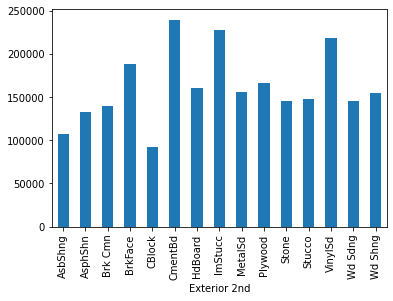

In [14]:
ames_housing.groupby('Exterior 2nd')['SalePrice'].mean().plot(kind='bar')

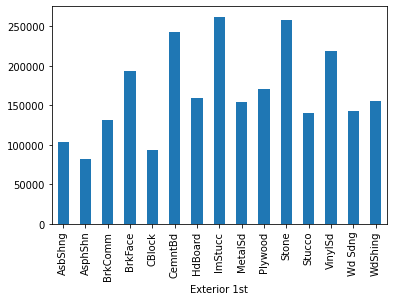

In [15]:
ames_housing.groupby('Exterior 1st')['SalePrice'].mean().plot(kind='bar')

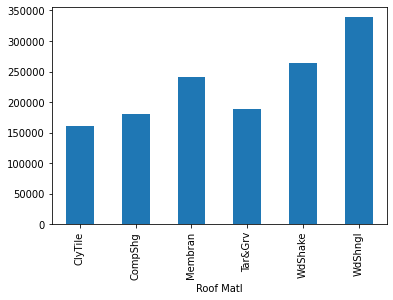

In [16]:
ames_housing.groupby('Roof Matl')['SalePrice'].mean().plot(kind='bar')

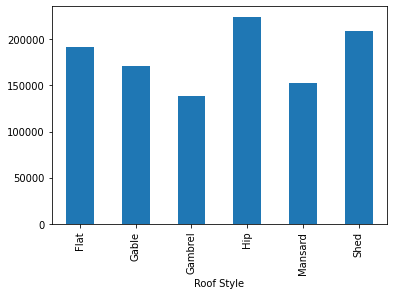

In [17]:
ames_housing.groupby('Roof Style')['SalePrice'].mean().plot(kind='bar')

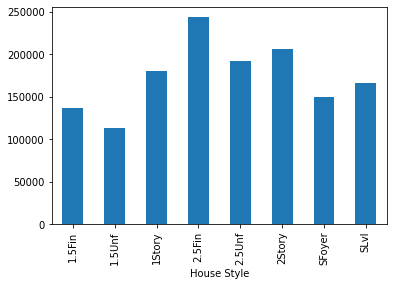

In [18]:
ames_housing.groupby('House Style')['SalePrice'].mean().plot(kind='bar')

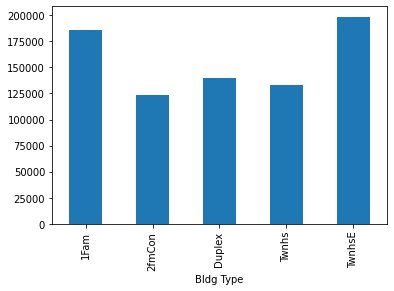

In [19]:
ames_housing.groupby('Bldg Type')['SalePrice'].mean().plot(kind='bar')

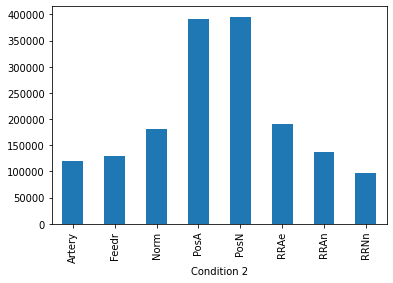

In [20]:
ames_housing.groupby('Condition 2')['SalePrice'].mean().plot(kind='bar')

In [58]:
pd.set_option('display.max_rows', None)


In [60]:
# exploring correlation with dummied zipcodes
ames_housing_dummy_condition_2 = pd.get_dummies(ames_housing, columns=['Condition 2'])
# sac_with_dummy_zip.head()
ames_housing_dummy_condition_2.corrwith(ames_housing_dummy_condition_2['SalePrice']).sort_values()

yearsold_minus_year_remod     -0.551716
PID                           -0.255052
Enclosed Porch                -0.135656
Kitchen AbvGr                 -0.125444
unfurnished_bsmt_percentage   -0.102703
Overall Cond                  -0.097019
Id                            -0.051398
Condition 2_Feedr             -0.048455
Bsmt Half Bath                -0.045290
Low Qual Fin SF               -0.041594
Condition 2_Artery            -0.038942
Condition 2_RRNn              -0.033403
Yr Sold                       -0.015203
Condition 2_RRAn              -0.012421
Condition 2_Norm              -0.009759
Condition 2_RRAe               0.002378
BsmtFin Type 2                 0.014741
BsmtFin SF 2                   0.016432
Pool Area                      0.023106
Mo Sold                        0.032735
Exter Cond                     0.036418
Condition 2_PosA               0.101044
Condition 2_PosN               0.103459
Screen Porch                   0.134581
Bedroom AbvGr                  0.137067


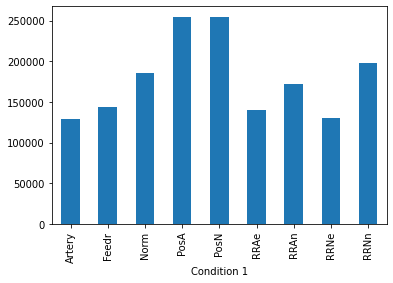

In [21]:
ames_housing.groupby('Condition 1')['SalePrice'].mean().plot(kind='bar')

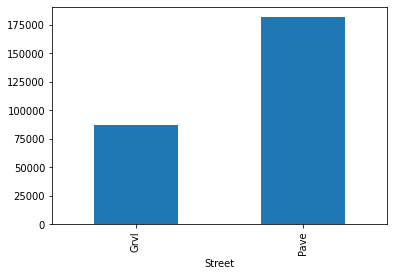

In [22]:
ames_housing.groupby('Street')['SalePrice'].mean().plot(kind='bar')

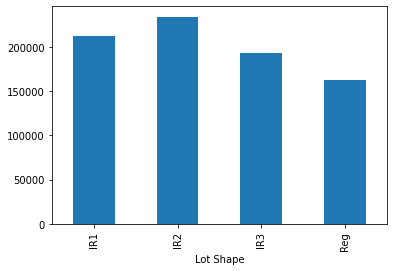

In [23]:
ames_housing.groupby('Lot Shape')['SalePrice'].mean().plot(kind='bar')

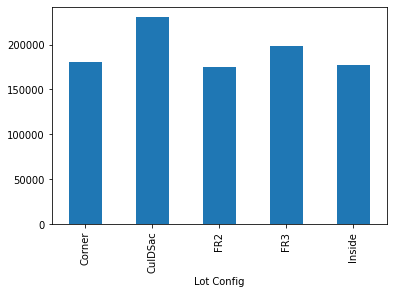

In [24]:
ames_housing.groupby('Lot Config')['SalePrice'].mean().plot(kind='bar')

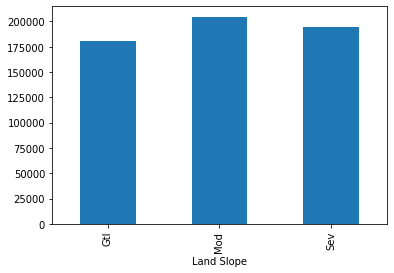

In [25]:
ames_housing.groupby('Land Slope')['SalePrice'].mean().plot(kind='bar')

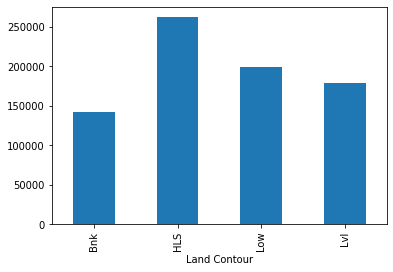

In [26]:
ames_housing.groupby('Land Contour')['SalePrice'].mean().plot(kind='bar')

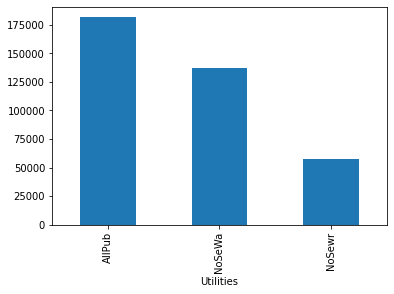

In [27]:
ames_housing.groupby('Utilities')['SalePrice'].mean().plot(kind='bar')

In [28]:
plt.figure(figsize = (10,7))
plt.title('Mean amount of Garage Type Sold', fontsize=22)
plt.ylabel('Sale Price', fontsize=18)
plt.xlabel('Garage Type', fontsize=18);
ames_housing.groupby('Garage Type')['SalePrice'].mean().plot(kind='bar');

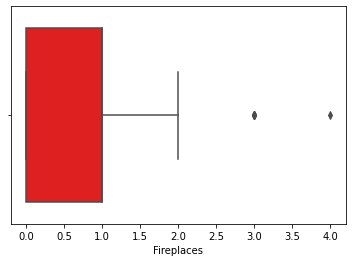

In [29]:
sns.boxplot(ames_housing['Fireplaces'], color='r')

In [30]:
plt.scatter(ames_housing['Garage Qual'],
            ames_housing['SalePrice'],
            color = 'black')


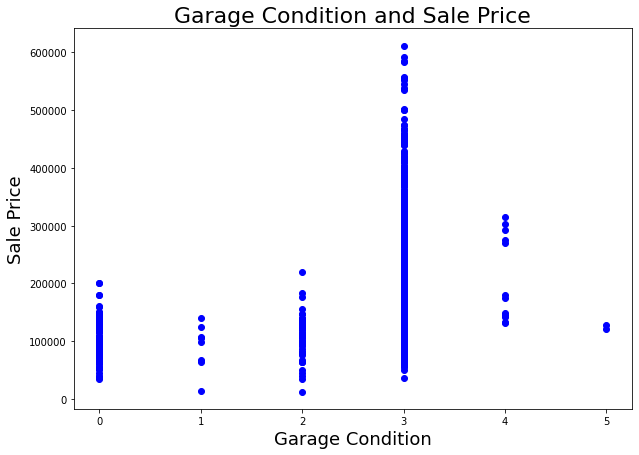

In [31]:
plt.figure(figsize = (10,7))
plt.title('Garage Condition and Sale Price', fontsize=22)
plt.ylabel('Sale Price', fontsize=18)
plt.xlabel('Garage Condition', fontsize=18);
plt.scatter(ames_housing['Garage Cond'],
            ames_housing['SalePrice'],
            color = 'blue')


In [ ]:
plt.figure(figsize=(20,10))

plt.hist(ames_housing.groupby('unfurnished_bsmt_percentage'))

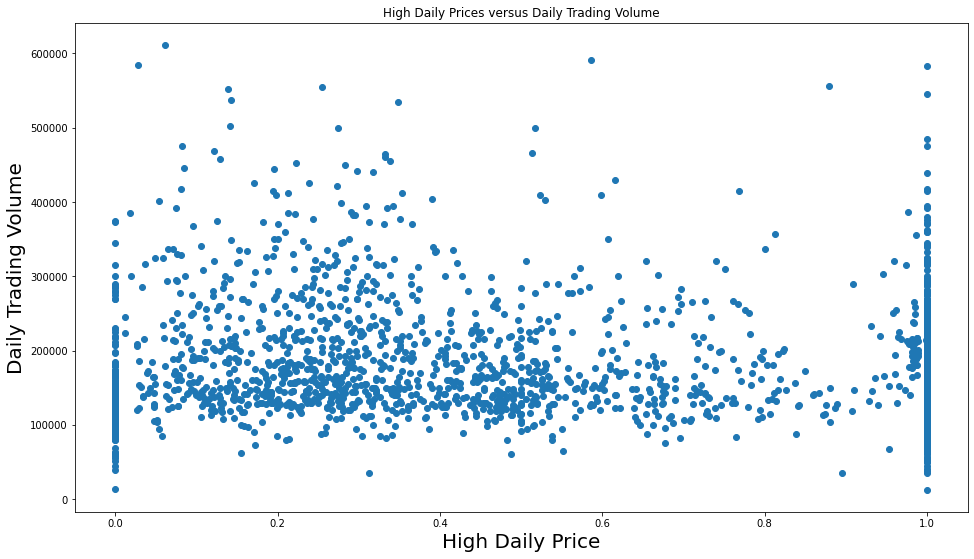

In [51]:
plt.figure(figsize=(16, 9))

# Create scatterplot of high prices versus volume.
plt.scatter(ames_housing['unfurnished_bsmt_percentage'],
            ames_housing['SalePrice'])

plt.title("High Daily Prices versus Daily Trading Volume")
plt.ylabel("Daily Trading Volume", fontsize = 20)
plt.xlabel("High Daily Price", fontsize = 20);

In [33]:
plt.figure(figsize = (10,7))

# Create histogram of observations with 25 bins.
plt.hist(ames_housing['unfurnished_bsmt_percentage'],
         bins = 25)

# Label axes.
plt.title('Distribution of P(Outcome = 1)', fontsize=22)
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize=18);

In [56]:
ames_housing['unfurnished_bsmt_percentage'].value_counts(normalize=True)

1.000000    0.294003
0.000000    0.080936
0.500000    0.008776
0.538462    0.001950
0.026042    0.001463
              ...   
0.181818    0.000488
0.018821    0.000488
0.262613    0.000488
0.494213    0.000488
0.645192    0.000488
Name: unfurnished_bsmt_percentage, Length: 1232, dtype: float64

In [34]:
ames_housing._get_numeric_data()

Id        PID  Lot Frontage  Lot Area  Overall Qual  Overall Cond  \
0      109  533352170           0.0     13517             6             8   
1      544  531379050          43.0     11492             7             5   
2      153  535304180          68.0      7922             5             7   
3      318  916386060          73.0      9802             5             5   
4      255  906425045          82.0     14235             6             8   
...    ...        ...           ...       ...           ...           ...   
2046  1587  921126030          79.0     11449             8             5   
2047   785  905377130           0.0     12342             4             5   
2048   916  909253010          57.0      7558             6             6   
2049   639  535179160          80.0     10400             4             5   
2050    10  527162130          60.0      7500             7             5   

      Year Built  Year Remod/Add  Mas Vnr Area  Exter Qual  ...  \
0           1976            2005         289.0           4  ...   
1           1996            1997         132.0           4  ...   
2           1953            2007           0.0           3  ...   
3           2006            2007           0.0           3  ...   
4           1900            1993           0.0           3  ...   
...          ...             ...           ...         ...  ...   
2046        2007            2007           0.0           4  ...   
2047        1940            1950           0.0           3  ...   
2048        1928            1950           0.0           3  ...   
2049        1956            1956           0.0           3  ...   
2050        1999            1999           0.0           3  ...   

      Enclosed Porch  Screen Porch  Pool Area  Mo Sold  Yr Sold  SalePrice  \
0                  0             0          0        3     2010     130500   
1                  0             0          0        4     2009     220000   
2                  0             0          0        1     2010     109000   
3                  0             0          0        4     2010     174000   
4                  0             0          0        3     2010     138500   
...              ...           ...        ...      ...      ...        ...   
2046               0             0          0        1     2008     298751   
2047               0             0          0        3     2009      82500   
2048               0             0          0        3     2009     177000   
2049             140             0          0       11     2009     144000   
2050               0             0          0        6     2010     189000   

      unfurnished_bsmt_percentage  gr_liv_area_and_total_bsmt  all_bathrooms  \
0                        0.264828                      2204.0            3.0   
1                        0.302300                      3035.0            4.0   
2                        0.308420                      2114.0            2.0   
3                        1.000000                      1828.0            3.0   
4                        1.000000                      2121.0            2.0   
...                           ...                         ...            ...   
2046                     0.463376                      3612.0            3.0   
2047                     0.695703                      1722.0            1.0   
2048                     1.000000                      2809.0            2.0   
2049                     0.245833                      2400.0            2.0   
2050                     1.000000                      2798.0            3.0   

      yearsold_minus_year_remod  
0                             5  
1                            12  
2                             3  
3                             3  
4                            17  
...                         ...  
2046                          1  
2047                         59  
2048                         59  
2049                         53  
2050  

In [35]:
pd.set_option('display.max_columns', None)

In [36]:
ames_housing._get_numeric_data().columns

Index(['Id', 'PID', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond',
       'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating QC', 'Central Air',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd',
       'Fireplaces', 'Fireplace Qu', 'Garage Yr Blt', 'Garage Finish',
       'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', 'Screen Porch',
       'Pool Area', 'Mo Sold', 'Yr Sold', 'SalePrice',
       'unfurnished_bsmt_percentage', 'gr_liv_area_and_total_bsmt',
       'all_bathrooms', 'yearsold_minus_year_remod'],
      dtype='object')

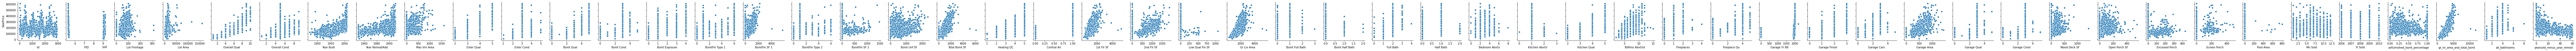

In [37]:
sns.pairplot(ames_housing, x_vars=['Id', 'PID', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond',
       'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating QC', 'Central Air',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd',
       'Fireplaces', 'Fireplace Qu', 'Garage Yr Blt', 'Garage Finish',
       'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', 'Screen Porch',
       'Pool Area', 'Mo Sold', 'Yr Sold',
       'unfurnished_bsmt_percentage', 'gr_liv_area_and_total_bsmt',
       'all_bathrooms', 'yearsold_minus_year_remod'],
                                    y_vars=['SalePrice']);

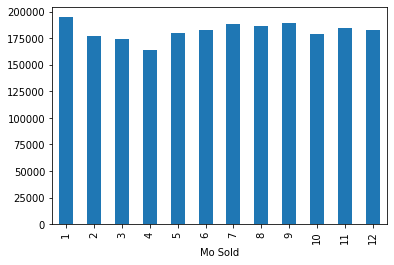

In [38]:
ames_housing.groupby('Mo Sold')['SalePrice'].mean().plot(kind='bar')

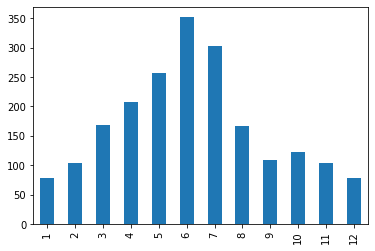

In [39]:
ames_housing['Mo Sold'].value_counts().sort_index().plot(kind='bar')

In [40]:
sorted(ames_housing['Mo Sold'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [41]:
# plt.figure(figsize=(20,10)

# plt.title('Average Shell Weight by Number of Rings and Gender', fontsize=30)
# plt.xlabel('Number of Rings', fontsize=20)
# plt.ylabel('Shell Weight (g)', fontsize=20)
# plt.legend(['Male', 'Female', 'Infant'], fontsize=20);

In [42]:
ames_housing['Mo Sold'].value_counts()

6     352
7     303
5     257
4     208
3     168
8     167
10    123
9     109
2     104
11    103
1      79
12     78
Name: Mo Sold, dtype: int64

In [43]:
(ames_housing['Fireplaces'] == 1).sum()

898

In [44]:
(ames_housing['Fireplaces'] == 2).sum()

146

In [45]:
(ames_housing['Fireplaces'] == 0).sum()

1000

In [46]:
ames_housing['Fireplaces'].value_counts()

0    1000
1     898
2     146
3       6
4       1
Name: Fireplaces, dtype: int64

In [47]:
ames_housing.groupby('Fireplaces')['SalePrice'].mean()

Fireplaces
0    142001.103000
1    215478.776169
2    239893.589041
3    234808.333333
4    260000.000000
Name: SalePrice, dtype: float64

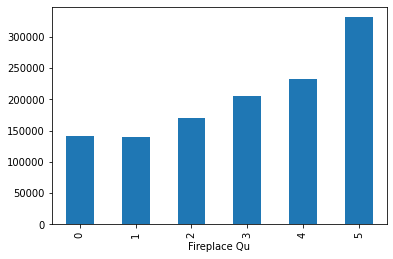

In [48]:
ames_housing.groupby('Fireplace Qu')['SalePrice'].mean().plot(kind='bar')

In [49]:
ames_housing['Fireplace Qu'].value_counts(normalize=True)

0    0.487567
4    0.254998
3    0.198440
2    0.028766
5    0.015115
1    0.015115
Name: Fireplace Qu, dtype: float64

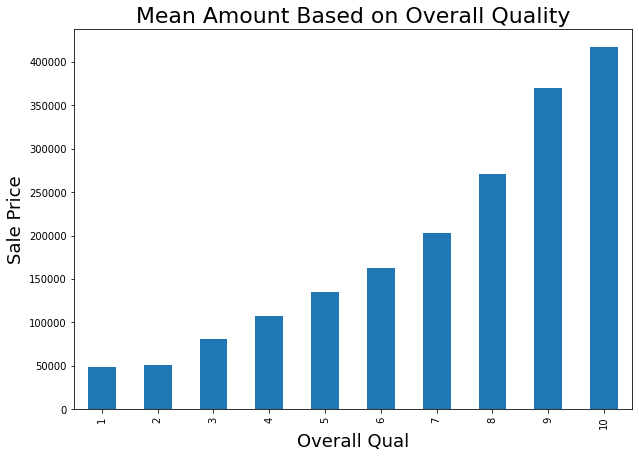

In [77]:
plt.figure(figsize = (10,7))
plt.title('Mean Amount Based on Overall Quality', fontsize=22)
plt.ylabel('Sale Price', fontsize=18)
plt.xlabel('Overall Quality', fontsize=18);
ames_housing.groupby('Overall Qual')['SalePrice'].mean().plot(kind='bar');

In [78]:
plt.figure(figsize=(16, 9))

# Create scatterplot of high prices versus volume.
plt.scatter(ames_housing['Overall Qual'],
            ames_housing['SalePrice'])

plt.title("Amount Based on Overall Quality")
plt.ylabel("Sale Price", fontsize = 20)
plt.xlabel("Overall Quality", fontsize = 20);

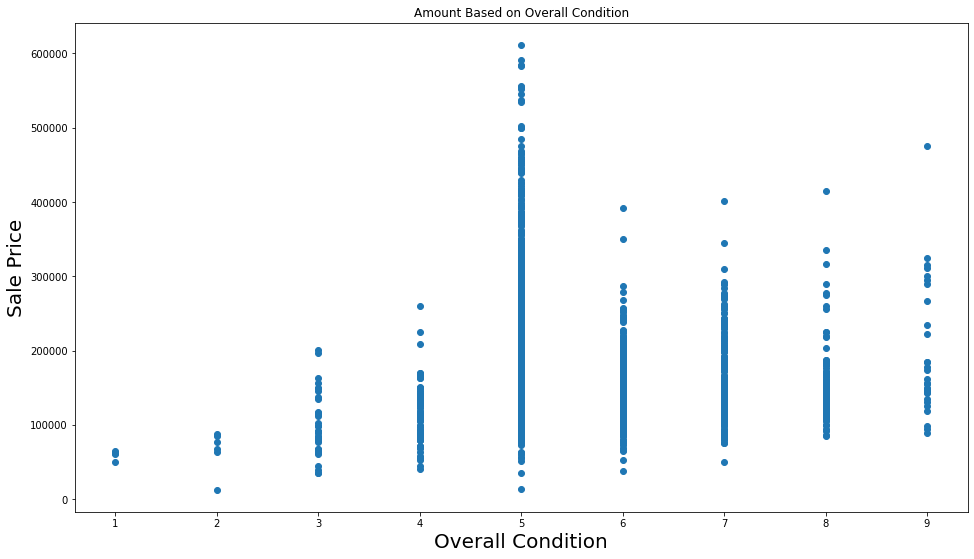

In [79]:
plt.figure(figsize=(16, 9))

# Create scatterplot of high prices versus volume.
plt.scatter(ames_housing['Overall Cond'],
            ames_housing['SalePrice'])

plt.title("Amount Based on Overall Condition")
plt.ylabel("Sale Price", fontsize = 20)
plt.xlabel("Overall Condition", fontsize = 20);

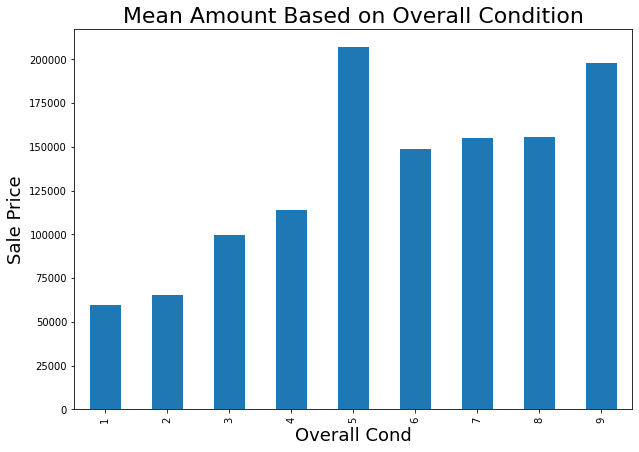

In [84]:
plt.figure(figsize = (10,7))
plt.title('Mean Amount Based on Overall Condition', fontsize=22)
plt.ylabel('Sale Price', fontsize=18)
plt.xlabel('Overall Condition', fontsize=18);
ames_housing.groupby('Overall Cond')['SalePrice'].mean().plot(kind='bar');

In [91]:
plt.figure(figsize = (10,7))
plt.title('Mean Amount Based on Exterior Quality', fontsize=22)
plt.ylabel('Sale Price', fontsize=18)
plt.xlabel('Exterior Quality', fontsize=18);
ames_housing.groupby('Exter Qual')['SalePrice'].mean().plot(kind='bar');

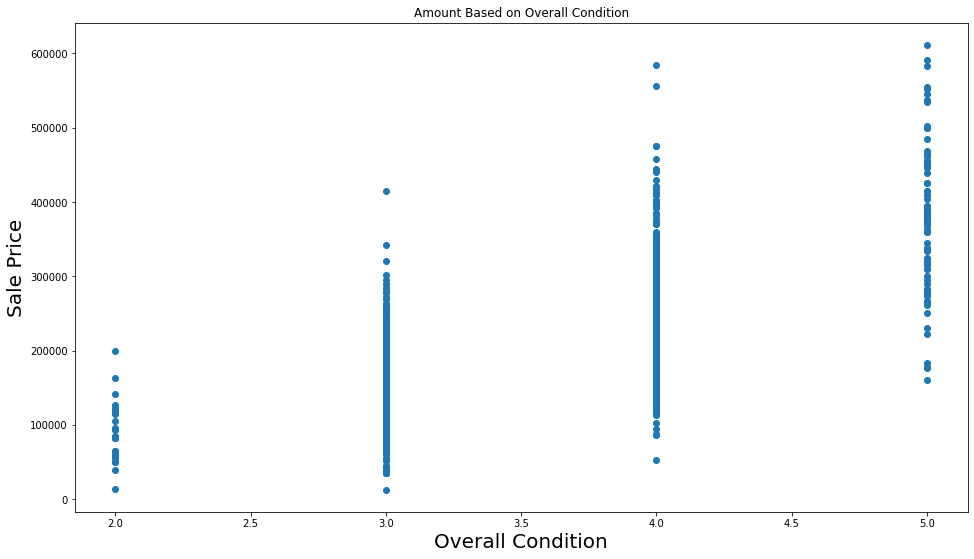

In [90]:
plt.figure(figsize=(16, 9))

# Create scatterplot of high prices versus volume.
plt.scatter(ames_housing['Exter Qual'],
            ames_housing['SalePrice'])

plt.title("Amount Based on Overall Condition")
plt.ylabel("Sale Price", fontsize = 20)
plt.xlabel("Overall Condition", fontsize = 20);

In [102]:
plt.figure(figsize = (10,7))
plt.title('Mean Amount Based on Exterior Quality', fontsize=22)
plt.ylabel('Sale Price', fontsize=18)
plt.xlabel('Exterior Quality', fontsize=18);
ames_housing.groupby('Exter Qual')['SalePrice'].mean().plot(kind='bar');

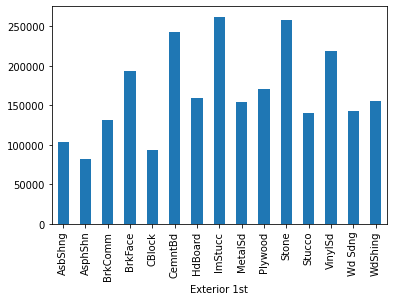

In [95]:

ames_housing.groupby('Exterior 1st')['SalePrice'].mean().plot(kind='bar');

In [101]:
plt.figure(figsize = (10,7))
plt.title('Mean Amount Based on Exterior Material', fontsize=22)
plt.ylabel('Sale Price', fontsize=18)
plt.xlabel('Exterior Material', fontsize=18);
ames_housing.groupby('Exterior 2nd')['SalePrice'].mean().plot(kind='bar');

In [99]:
# exploring correlation with dummied neighhborhood
ames_housing_dummy_exterior1 = pd.get_dummies(ames_housing, columns=['Exterior 1st'])

ames_housing_dummy_exterior1.corrwith(ames_housing_dummy_condition_2['SalePrice']).sort_values()

yearsold_minus_year_remod     -0.551716
PID                           -0.255052
Exterior 1st_Wd Sdng          -0.191734
Exterior 1st_MetalSd          -0.149851
Enclosed Porch                -0.135656
Exterior 1st_AsbShng          -0.126340
Kitchen AbvGr                 -0.125444
Exterior 1st_HdBoard          -0.114332
unfurnished_bsmt_percentage   -0.102703
Overall Cond                  -0.097019
Exterior 1st_Stucco           -0.060864
Id                            -0.051398
Exterior 1st_WdShing          -0.048866
Bsmt Half Bath                -0.045290
Low Qual Fin SF               -0.041594
Exterior 1st_Plywood          -0.039125
Exterior 1st_CBlock           -0.034783
Exterior 1st_AsphShn          -0.027621
Exterior 1st_BrkComm          -0.024377
Yr Sold                       -0.015203
BsmtFin Type 2                 0.014741
BsmtFin SF 2                   0.016432
Exterior 1st_ImStucc           0.022446
Pool Area                      0.023106
Exterior 1st_BrkFace           0.026240


In [100]:
# exploring correlation with dummied neighhborhood
ames_housing_dummy_exterior2 = pd.get_dummies(ames_housing, columns=['Exterior 2nd'])

ames_housing_dummy_exterior2.corrwith(ames_housing_dummy_condition_2['SalePrice']).sort_values()

yearsold_minus_year_remod     -0.551716
PID                           -0.255052
Exterior 2nd_Wd Sdng          -0.172971
Exterior 2nd_MetalSd          -0.139339
Enclosed Porch                -0.135656
Kitchen AbvGr                 -0.125444
Exterior 2nd_AsbShng          -0.110404
unfurnished_bsmt_percentage   -0.102703
Exterior 2nd_HdBoard          -0.102462
Overall Cond                  -0.097019
Exterior 2nd_Wd Shng          -0.061164
Exterior 2nd_Plywood          -0.059541
Exterior 2nd_Stucco           -0.051885
Id                            -0.051398
Exterior 2nd_Brk Cmn          -0.047893
Bsmt Half Bath                -0.045290
Low Qual Fin SF               -0.041594
Exterior 2nd_CBlock           -0.035276
Exterior 2nd_Stone            -0.024642
Exterior 2nd_AsphShn          -0.023834
Yr Sold                       -0.015203
Exterior 2nd_BrkFace           0.010688
BsmtFin Type 2                 0.014741
BsmtFin SF 2                   0.016432
Pool Area                      0.023106


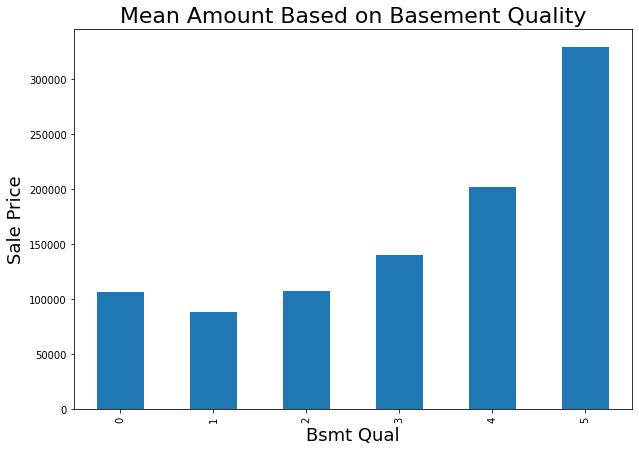

In [104]:
plt.figure(figsize = (10,7))
plt.title('Mean Amount Based on Basement Quality', fontsize=22)
plt.ylabel('Sale Price', fontsize=18)
plt.xlabel('Basement Quality', fontsize=18);
ames_housing.groupby('Bsmt Qual')['SalePrice'].mean().plot(kind='bar');

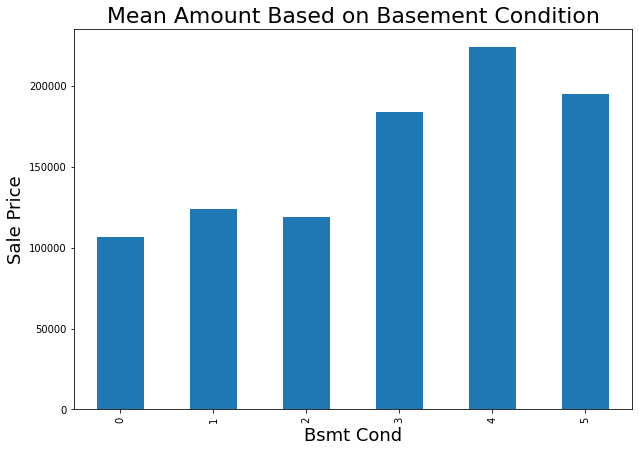

In [157]:
plt.figure(figsize = (10,7))
plt.title('Mean Amount Based on Basement Condition', fontsize=22)
plt.ylabel('Sale Price', fontsize=18)
plt.xlabel('Basement Condition', fontsize=18);
ames_housing.groupby('Bsmt Cond')['SalePrice'].mean().plot(kind='bar');

In [159]:
plt.figure(figsize = (10,7))
plt.title('Mean Amount Based on Basement Condition', fontsize=22)
plt.ylabel('Sale Price', fontsize=18)
plt.xlabel('Basement Condition', fontsize=18);

plt.scatter(ames_housing['Bsmt Cond'],
            ames_housing['SalePrice'],
            color = 'blue');

In [ ]:
# Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, 
# BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Bsmt Full Bath, Bsmt Half Bath               

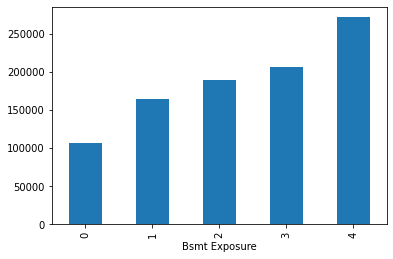

In [105]:
ames_housing.groupby('Bsmt Exposure')['SalePrice'].mean().plot(kind='bar');

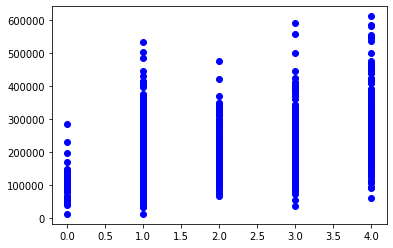

In [150]:
# plt.figure(figsize = (10,7))
# plt.title('Price Home Sold By Year Built', fontsize=22)
# plt.ylabel('Sale Price', fontsize=18)
# plt.xlabel('Year Built', fontsize=18);
plt.scatter(ames_housing['Bsmt Exposure'],
            ames_housing['SalePrice'],
            color = 'blue');

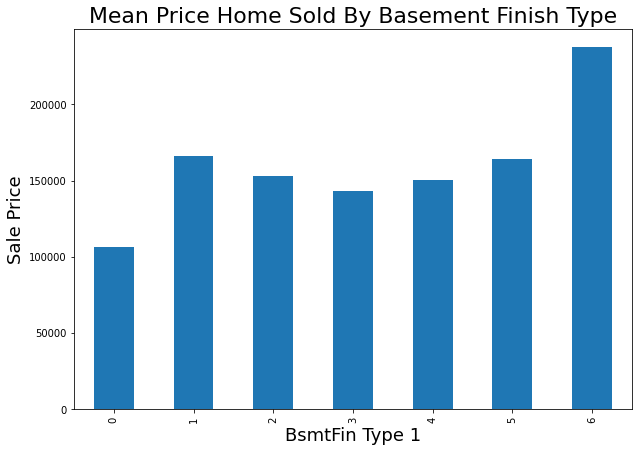

In [153]:
plt.figure(figsize = (10,7))
plt.title('Mean Price Home Sold By Basement Finish Type', fontsize=22)
plt.ylabel('Sale Price', fontsize=18)
plt.xlabel('Basement Finished Type', fontsize=18);
ames_housing.groupby('BsmtFin Type 1')['SalePrice'].mean().plot(kind='bar');

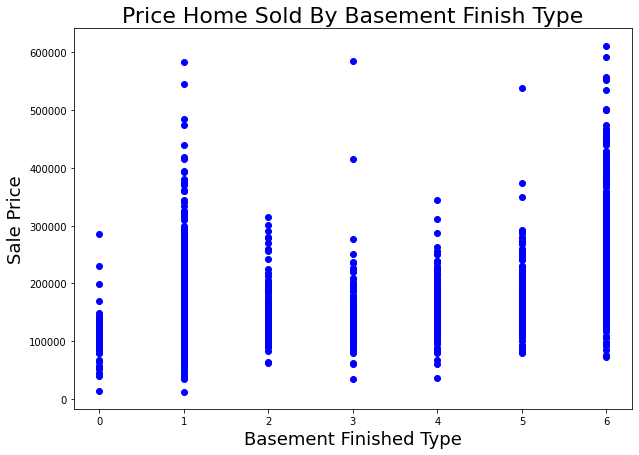

In [152]:
plt.figure(figsize = (10,7))
plt.title('Price Home Sold By Basement Finish Type', fontsize=22)
plt.ylabel('Sale Price', fontsize=18)
plt.xlabel('Basement Finished Type', fontsize=18);
plt.scatter(ames_housing['BsmtFin Type 1'],
            ames_housing['SalePrice'],
            color = 'blue');

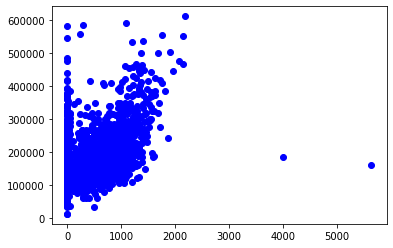

In [112]:
# plt.figure(figsize = (10,7))
# plt.title('Price Home Sold By Year Built', fontsize=22)
# plt.ylabel('Sale Price', fontsize=18)
# plt.xlabel('Year Built', fontsize=18);
plt.scatter(ames_housing['BsmtFin SF 1'],
            ames_housing['SalePrice'],
            color = 'blue');

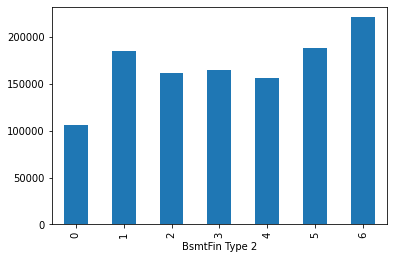

In [113]:
ames_housing.groupby('BsmtFin Type 2')['SalePrice'].mean().plot(kind='bar');

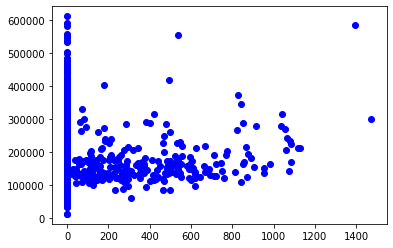

In [114]:
# plt.figure(figsize = (10,7))
# plt.title('Price Home Sold By Year Built', fontsize=22)
# plt.ylabel('Sale Price', fontsize=18)
# plt.xlabel('Year Built', fontsize=18);
plt.scatter(ames_housing['BsmtFin SF 2'],
            ames_housing['SalePrice'],
            color = 'blue');

In [115]:
# Bsmt Unf SF, Total Bsmt SF, Bsmt Full Bath, Bsmt Half Bath    

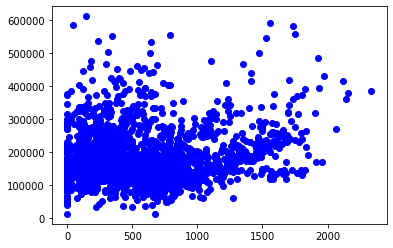

In [117]:
# plt.figure(figsize = (10,7))
# plt.title('Price Home Sold By Year Built', fontsize=22)
# plt.ylabel('Sale Price', fontsize=18)
# plt.xlabel('Year Built', fontsize=18);
plt.scatter(ames_housing['Bsmt Unf SF'],
            ames_housing['SalePrice'],
            color = 'blue');

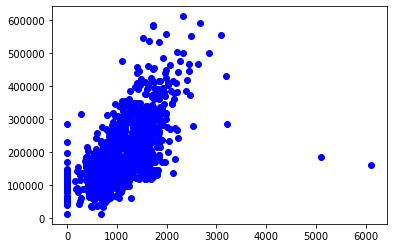

In [118]:
# plt.figure(figsize = (10,7))
# plt.title('Price Home Sold By Year Built', fontsize=22)
# plt.ylabel('Sale Price', fontsize=18)
# plt.xlabel('Year Built', fontsize=18);
plt.scatter(ames_housing['Total Bsmt SF'],
            ames_housing['SalePrice'],
            color = 'blue');

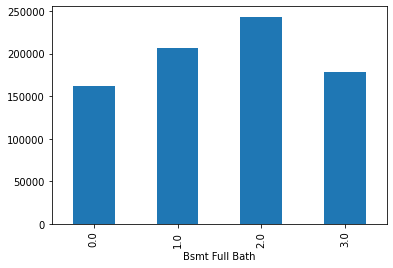

In [119]:
ames_housing.groupby('Bsmt Full Bath')['SalePrice'].mean().plot(kind='bar');

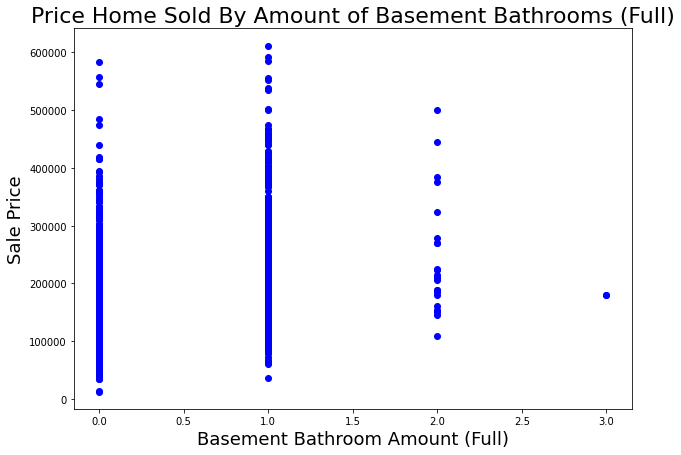

In [155]:
plt.figure(figsize = (10,7))
plt.title('Price Home Sold By Amount of Basement Bathrooms (Full)', fontsize=22)
plt.ylabel('Sale Price', fontsize=18)
plt.xlabel('Basement Bathroom Amount (Full)', fontsize=18);
plt.scatter(ames_housing['Bsmt Full Bath'],
            ames_housing['SalePrice'],
            color = 'blue');

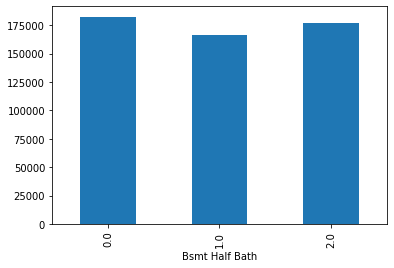

In [120]:
ames_housing.groupby('Bsmt Half Bath')['SalePrice'].mean().plot(kind='bar');

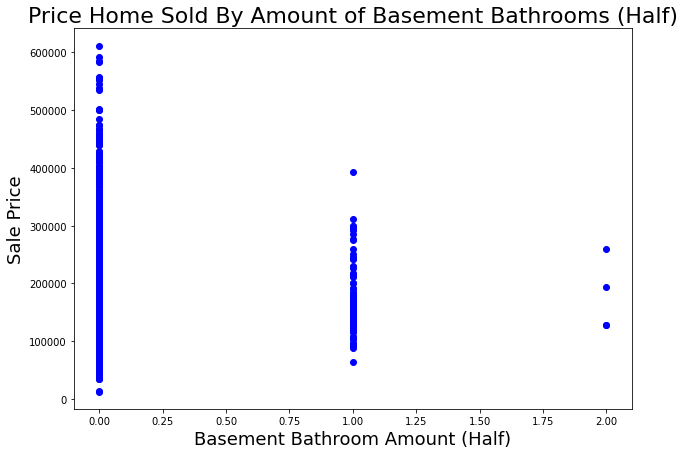

In [156]:
plt.figure(figsize = (10,7))
plt.title('Price Home Sold By Amount of Basement Bathrooms (Half)', fontsize=22)
plt.ylabel('Sale Price', fontsize=18)
plt.xlabel('Basement Bathroom Amount (Half)', fontsize=18);
plt.scatter(ames_housing['Bsmt Half Bath'],
            ames_housing['SalePrice'],
            color = 'blue');

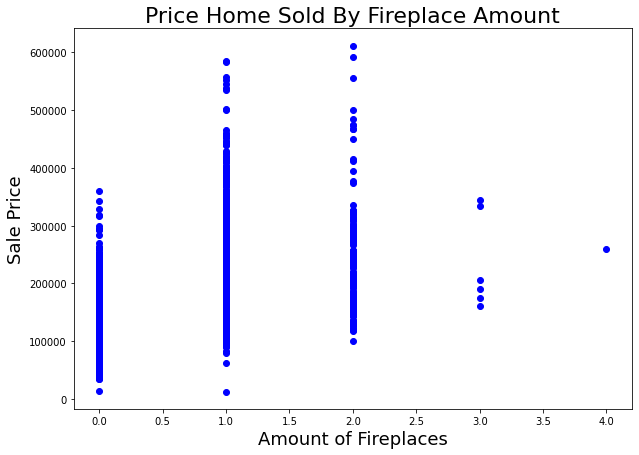

In [160]:
plt.figure(figsize = (10,7))
plt.title('Price Home Sold By Fireplace Amount', fontsize=22)
plt.ylabel('Sale Price', fontsize=18)
plt.xlabel('Amount of Fireplaces', fontsize=18);
plt.scatter(ames_housing['Fireplaces'],
            ames_housing['SalePrice'],
            color = 'blue');

# https://weatherspark.com/y/10339/Average-Weather-in-Ames-Iowa-United-States-Year-Round

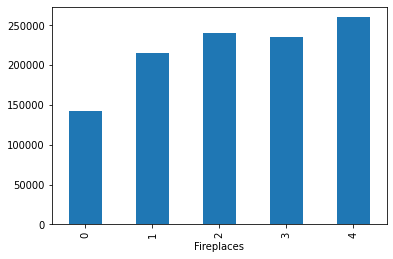

In [124]:
ames_housing.groupby('Fireplaces')['SalePrice'].mean().plot(kind='bar');

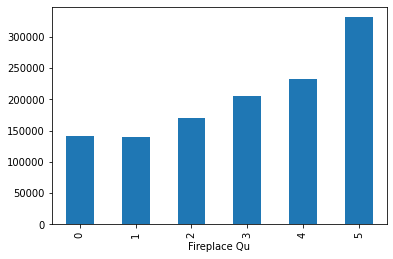

In [125]:
ames_housing.groupby('Fireplace Qu')['SalePrice'].mean().plot(kind='bar');

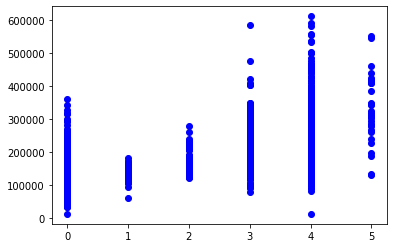

In [126]:
# plt.figure(figsize = (10,7))
# plt.title('Price Home Sold By Year Built', fontsize=22)
# plt.ylabel('Sale Price', fontsize=18)
# plt.xlabel('Year Built', fontsize=18);
plt.scatter(ames_housing['Fireplace Qu'],
            ames_housing['SalePrice'],
            color = 'blue');

In [127]:
# Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond

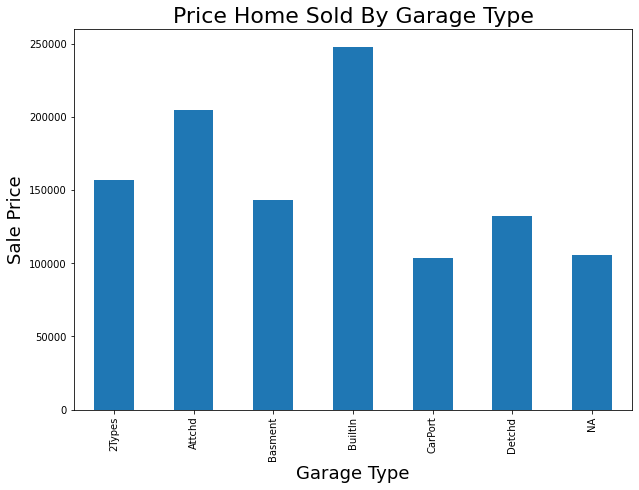

In [161]:
plt.figure(figsize = (10,7))
plt.title('Price Home Sold By Garage Type', fontsize=22)
plt.ylabel('Sale Price', fontsize=18)
plt.xlabel('Gargage Type', fontsize=18);
ames_housing.groupby('Garage Type')['SalePrice'].mean().plot(kind='bar');

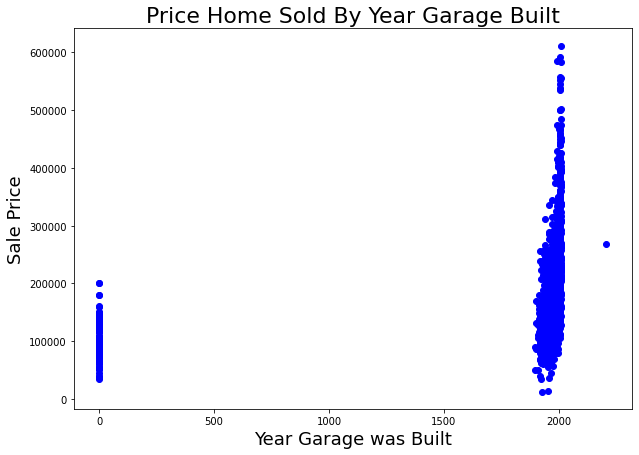

In [162]:
plt.figure(figsize = (10,7))
plt.title('Price Home Sold By Year Garage Built', fontsize=22)
plt.ylabel('Sale Price', fontsize=18)
plt.xlabel('Year Garage was Built', fontsize=18);
plt.scatter(ames_housing['Garage Yr Blt'],
            ames_housing['SalePrice'],
            color = 'blue');

In [165]:
(ames_housing['Garage Yr Blt'] == 0).sum()

114

In [168]:
(ames_housing['Garage Yr Blt'] >= 2000).sum()

579

In [171]:
(ames_housing['Garage Yr Blt'] >= 1950).sum()

1701

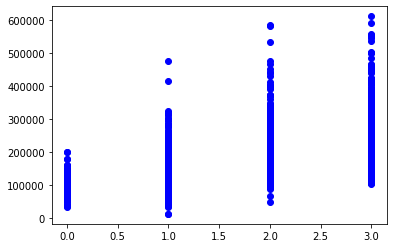

In [134]:
# plt.figure(figsize = (10,7))
# plt.title('Price Home Sold By Year Built', fontsize=22)
# plt.ylabel('Sale Price', fontsize=18)
# plt.xlabel('Year Built', fontsize=18);
plt.scatter(ames_housing['Garage Finish'],
            ames_housing['SalePrice'],
            color = 'blue');

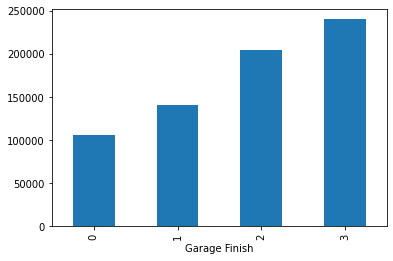

In [135]:
ames_housing.groupby('Garage Finish')['SalePrice'].mean().plot(kind='bar');

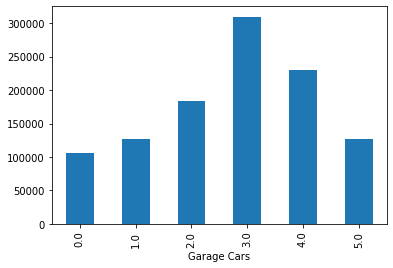

In [136]:
ames_housing.groupby('Garage Cars')['SalePrice'].mean().plot(kind='bar');

In [172]:
plt.figure(figsize = (10,7))
plt.title('Price Home Sold By Garage Size', fontsize=22)
plt.ylabel('Sale Price', fontsize=18)
plt.xlabel('Garage Car Size', fontsize=18);
plt.scatter(ames_housing['Garage Cars'],
            ames_housing['SalePrice'],
            color = 'blue');

In [138]:
# Garage Area, Garage Qual, Garage Cond

In [139]:
# plt.figure(figsize = (10,7))
# plt.title('Price Home Sold By Year Built', fontsize=22)
# plt.ylabel('Sale Price', fontsize=18)
# plt.xlabel('Year Built', fontsize=18);
plt.scatter(ames_housing['Garage Area'],
            ames_housing['SalePrice'],
            color = 'blue');

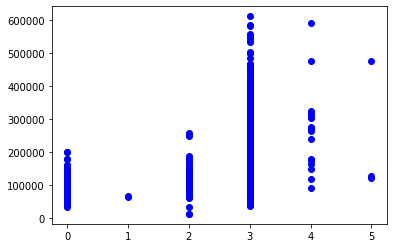

In [140]:
# plt.figure(figsize = (10,7))
# plt.title('Price Home Sold By Year Built', fontsize=22)
# plt.ylabel('Sale Price', fontsize=18)
# plt.xlabel('Year Built', fontsize=18);
plt.scatter(ames_housing['Garage Qual'],
            ames_housing['SalePrice'],
            color = 'blue');

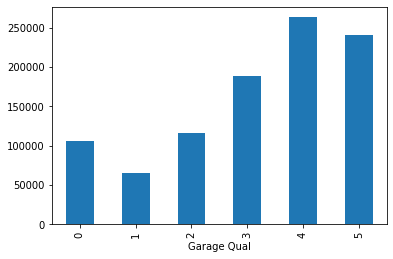

In [141]:
ames_housing.groupby('Garage Qual')['SalePrice'].mean().plot(kind='bar');

In [142]:
# Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, all_bathrooms

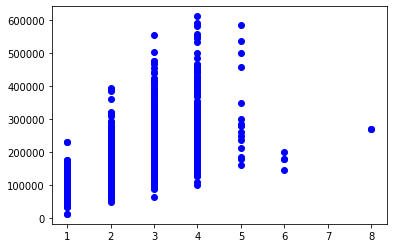

In [143]:
# plt.figure(figsize = (10,7))
# plt.title('Price Home Sold By Year Built', fontsize=22)
# plt.ylabel('Sale Price', fontsize=18)
# plt.xlabel('Year Built', fontsize=18);
plt.scatter(ames_housing['all_bathrooms'],
            ames_housing['SalePrice'],
            color = 'blue');

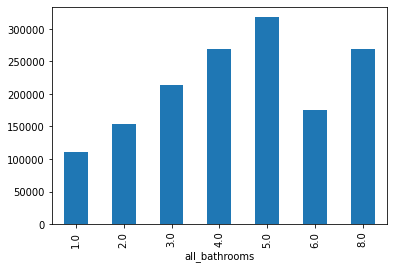

In [144]:
ames_housing.groupby('all_bathrooms')['SalePrice'].mean().plot(kind='bar');

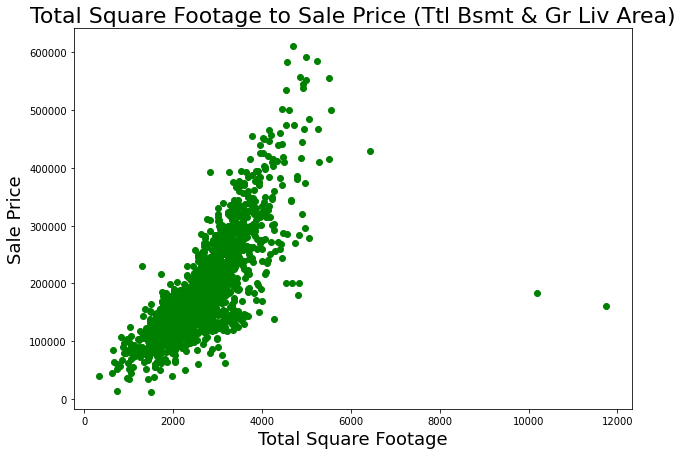

In [149]:
plt.figure(figsize = (10,7))
plt.title('Total Square Footage to Sale Price (Ttl Bsmt & Gr Liv Area)', fontsize=22)
plt.ylabel('Sale Price', fontsize=18)
plt.xlabel('Total Square Footage', fontsize=18);
plt.scatter(ames_housing['gr_liv_area_and_total_bsmt'],
            ames_housing['SalePrice'],
            color = 'green');